### imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
housing_data = pd.read_csv("housing.csv")

In [26]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### analyzing the data

In [27]:
housing_data.info() # view info on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
housing_data['ocean_proximity'].value_counts() # shows the different categories in the data column

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### visualizing differnt data categories

<Axes: >

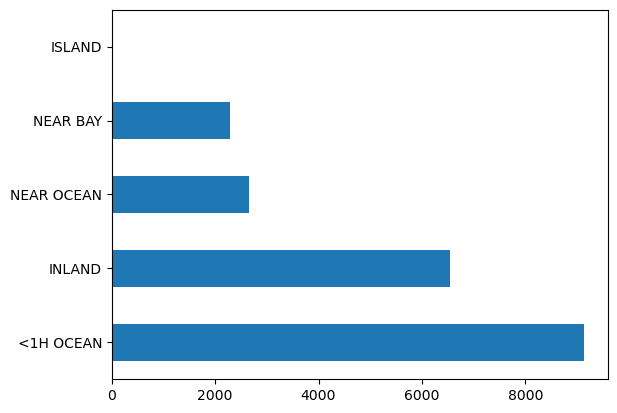

In [29]:
housing_data['ocean_proximity'].value_counts().plot(kind='barh') #barh => horizontal plot

In [30]:
# using .describe() -> gives statistical measures on all numerical columns
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

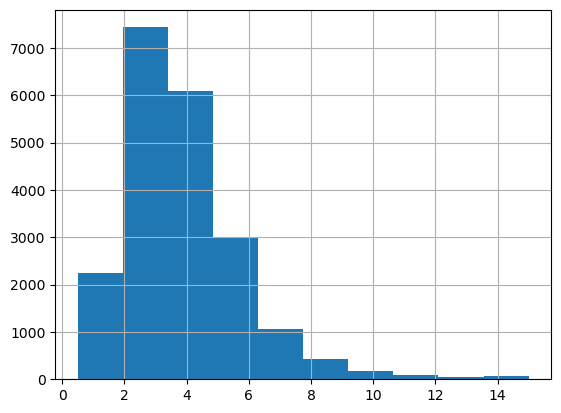

In [31]:
housing_data["median_income"].hist()

**purpose**: simplifies and allows for categorical analysis

In [32]:
# code from textbok

# pd.cut() -> creates bins for values
# bins = grouping continuous data values into discrete intervals
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # np.inf -> to infinity
                                labels=[1, 2, 3, 4, 5])

<Axes: >

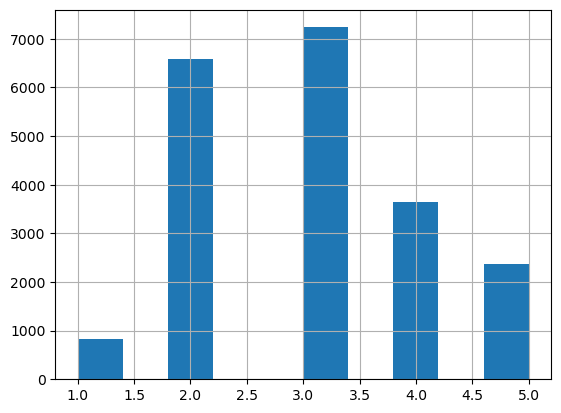

In [33]:
# visualizing the bins
housing_data["income_cat"].hist()

we can see above that more people are in the middle income with few people poor etc...

## Visualition Process

creating features and labels

In [34]:
# X - features/predictors -> meaning: all the other columns in the data with the exception of the target variable
# y - target variable

y = housing_data['median_house_value'] # values we want to predict
X = housing_data.drop('median_house_value', axis=1) # values we are using for prediction

## Split datasets

for training and testing models *(somewhat manually)*

In [35]:
from sklearn.model_selection import train_test_split

split data (horizontally) into trianing set and testing set

In [36]:
# conventional variables, adviceable not to change. X - 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # .33 -> will be in testing set, remainder (.67) in training set
# ml model uses test set only. when trained, you feed it test set to test

# random split - ensures that the split is reproducible; multiple reruns will give you the same values✅

apparently median income is important for determining price of the house. 
taking a quick look at the data to understand it

<Axes: >

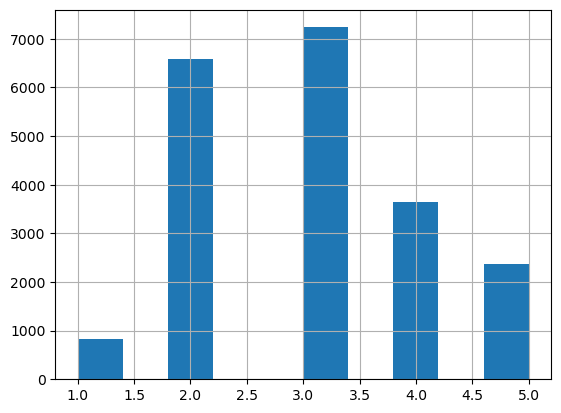

In [37]:
housing_data["income_cat"].hist()

checking that the training set (sample) is similar or almost equivalent to the actual data

<Axes: >

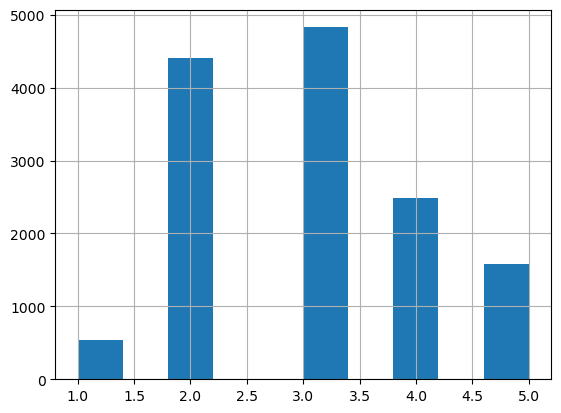

In [38]:
X_train["income_cat"].hist()

### Using stratified split

puts 20% in testing and 80 in training

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

# split data using 'income_cat'columnn to ensure even distribution of approximate percentages of each income cat
for train_index, test_index in splitter.split(housing_data, housing_data["income_cat"]):
    strat_train_set_n = housing_data.iloc[train_index]
    strat_test_set_n = housing_data.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [40]:
strat_train_set, strat_test_set = strat_splits[0]

In [41]:
strat_train_set, strat_test_set = train_test_split(
    housing_data, test_size=0.2, stratify=housing_data["income_cat"], random_state=42)

In [42]:
strat_splits

[[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  12655    -121.46     38.52                29.0       3873.0           797.0   
  15502    -117.23     33.09                 7.0       5320.0           855.0   
  2908     -119.04     35.37                44.0       1618.0           310.0   
  14053    -117.13     32.75                24.0       1877.0           519.0   
  20496    -118.70     34.28                27.0       3536.0           646.0   
  ...          ...       ...                 ...          ...             ...   
  15174    -117.07     33.03                14.0       6665.0          1231.0   
  12661    -121.42     38.51                15.0       7901.0          1422.0   
  19263    -122.72     38.44                48.0        707.0           166.0   
  19140    -122.70     38.31                14.0       3155.0           580.0   
  19773    -122.14     39.97                27.0       1079.0           222.0   
  
         population  hous

In [43]:
#Checking the proportions -> verifying that the stratification has been done correctly
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [44]:
housing_data['income_cat'].value_counts() / len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

you will observe that the data has close similarites. this is a clear indication that the stratified split did a good job. (accurate preservation of data distribution in training data)

### Calculating Actual percentage error between predictions and original data

In [45]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing_data),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                    compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                    compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.02,0.36,0.97
2,31.88,31.88,32.44,-0.02,1.73
3,35.06,35.05,35.85,-0.01,2.27
4,17.63,17.64,16.74,0.03,-5.06
5,11.44,11.43,10.95,-0.08,-4.32


### Dropping the 'income_cat' column

In [46]:
strat_test_set.drop('income_cat', axis=1, inplace=True) #drop from test
strat_train_set.drop('income_cat', axis=1, inplace=True) #drop from training

## Visualizing Predictions